# Calculating $\pi$ Using a Monte-Carlo Method 

This notebook demonstrates using a Monte Carlo method to calculate the value of $\pi$ numerically.

## Author
J. Bott
## Calculating $\pi$ Using a Small Number of Samples

The value of $\pi$ is estimated by sampling 1'000 points in a square enclosing the unit circle. 

The number of points inside the unit circle is calculated by testing each point in the equation of a circle:

$x^2 + y^2 <= r^2$

The count of points which fall inside the unit circle, $N_{circle}$, provides an estimate for the area of the circle as a fraction of $A$, the area of the enclosing square. 

$A_{circle} = A \frac{N_{circle}}{N}$

Where $N$ is the total number of point samples.

Using the formula for the area of the unit circle we have an estimate for $\pi$.

$
\begin{align}
A_{circle} &= \pi r^2 \\
\pi &= \frac{A_{circle}}{r^2}
\end{align}
$

And for our unit circle:

$
\pi = A_{circle} = A \frac{N_{circle}}{N}
$




After 1000 trials, 780 samples fall within the circle.
The estimated value of Pi is: 3.12
Percent error is: -0.6873 %


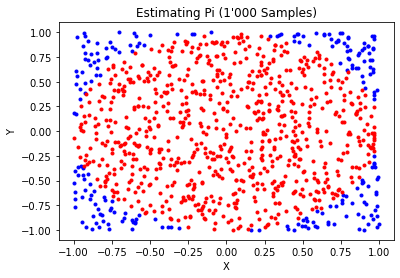

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Create 1000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((-1,-1),(1,1),(1000,2)))
df['Inside'] = df.apply(lambda row: row["X"]**2 + row["Y"]**2 <= 1, axis=1)

# Points inside circle
nPoints = df.shape[0]
nPointsInCircle = df['Inside'].sum()

# Area of the enclosing square 
A = 2**2

# Calculated value of Pi
piCalculated = A * nPointsInCircle / nPoints

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")
print(f"Percent error is: {(100*(piCalculated-np.pi)/np.pi):.4f} %")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (1'000 Samples)")
plt.show()


There error of the estimated value of $\pi$ pi varies depending on the set of random points which are generated, as shown in the table below.

|Trial No. | $\pi$ Estimate |
| ---- | ---- |
|1 | -2.7245 % |
|2 | -1.7059 % |
|3 |  0.9679 % |
|4 | -1.9606 % |
|5 |  1.7318 % |

## Increasing the Sample Size

If we increase the sample size to 100'000 points in general we get a better estimate of $\pi$.

After 100000 trials, 78893 samples fall within the circle.
The estimated value of Pi is: 3.15572
Percent error is: 0.4497 %


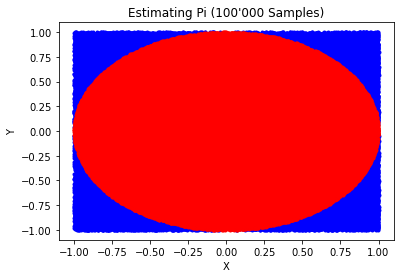

In [2]:
# Create 100`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((-1,-1),(1,1),(100000,2)))
df['Inside'] = df.apply(lambda row: row["X"]**2 + row["Y"]**2 <= 1, axis=1)

piCalculated = 2**2*df['Inside'].sum() / df.shape[0]

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")
print(f"Percent error is: {(100*(piCalculated-np.pi)/np.pi):.4f} %")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (100'000 Samples)")
plt.show()


There is less spread in the error of the estimated $\pi$ values with a higher number of sample points, as shown in the table below.

|Trial No. | $\pi$ Estimate |
| ---- | ---- |
|1 | -0.1844 % |
|2 |  0.1174 % |
|3 |  0.1416 % |
|4 | -0.1513 % |
|5 |  0.0333 % |

## Vectorized Calculation

We can extend the calculation to 100'000'000 sample points and use a vectorized operation to increase the speed of the calculation.


In [3]:
# Create 100`000`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((-1,-1),(1,1),(100000000,2)))

# Using vector operations to improve performance
df['Inside'] = (df['X']**2 + df['Y']**2) <= 1
piCalculated = 2**2 * df['Inside'].sum() / df.shape[0]

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")
print(f"Percent error is: {(100*(piCalculated-np.pi)/np.pi):.4f} %")


After 100000000 trials, 78535501 samples fall within the circle.
The estimated value of Pi is: 3.14142004
Percent error is: -0.0055 %
